# Hypothesis Testing Question 1

A F&B manager wants to determine whether there is any significant difference in the diameter of the cutlet between two units. A randomly selected sample of cutlets was collected from both units and measured? Analyze the data and draw inferences at 5% significance level. Please state the assumptions and tests that you carried out to check validity of the assumptions.

Minitab File : Cutlets.mtw


### Defining H0 and Ha:
H0 => Significant difference does not exist between the diameter of cutlets from the two units => u1 = u2
Ha => Significant difference exists between the diameter of cutlets from the two units => u1 != u2

### Significane level & Critical Values 
alpha = 0.95


Inputs are Diameter 1 (Unit A) and and Diameter 2 (Unit B) that is Discrete in two categories
Output is continuous as we are trying to see the difference in diameter and diameter is a continuous variable
We proceed with 2-sample z-test. 

### Steps to follow

1. Import dataset
2. Check if both Unit A and Unit B are normally distributed using any normality test. #Normality Test
3. Check if both variances are same. #Variance Test
4. Go for two sample t-test.
5. Accept/Reject Null Hypothesis based on P-Value.
If p-value < 0.05, reject Null Hypothesis.
If p-value > 0.05, fail to reject Null Hypothesis.


In [1]:
import pandas as pd
import statsmodels.api as sm
import pylab
from scipy.stats import norm
import scipy.stats as ss

In [2]:
Q1= pd.read_csv('C:\\Users\\Vignesh R Babu\\Documents\\ExcelRPython\\Assignment Codes\\3\\Cutlets.csv')
Q1.rename(columns = {'Unit A' : 'Unit_A', 'Unit B' : 'Unit_B'}, inplace = True)
Q1

,Unit_A,Unit_B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522
5,7.3871,6.8110
6,6.8755,7.2212
7,7.0621,6.6606
8,6.6840,7.2402
9,6.8236,7.0503


### Normality Test:
We use QQ-plots and Shapiro test to check if both data sets have normal distribution.

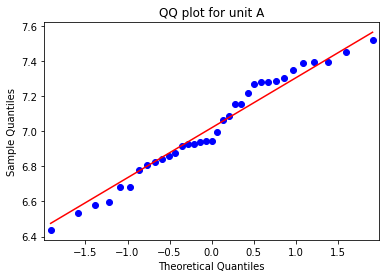

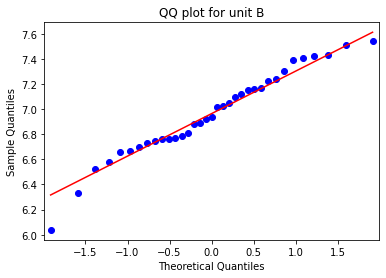

In [7]:
sm.qqplot(Q1.Unit_A, line = 's')
pylab.title('QQ plot for unit A')

sm.qqplot(Q1.Unit_B, line = 's')
pylab.title('QQ plot for unit B')
pylab.show() #Both are almost normal as per QQ plot

In [ ]:
x = Q1.Unit_A.copy()
x = norm.rvs(size=35) # for shapiro-test, the random variables are normalised for better results.
ss.shapiro(Q1.Unit_A) #P-value greater than 0.05. So normally distributed

In [ ]:
y = Q1.Unit_B.copy()
y = norm.rvs(size=35)
ss.shapiro(Q1.Unit_B)  #P-value greater than 0.05. So normally distributed

### Variance test

Variance test is carried out using Levene test. https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.levene.html

In [ ]:
Q1.var() #Both variances are different in our view. Proceed to Levene test.

In [ ]:
ss.levene(Q1.Unit_A,Q1.Unit_B) #P-value = 0.417. Therefore greater than 0.05. Both Variances could be considered as same.

### 2-Sample t-test: 
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

In [ ]:
ss.ttest_ind(Q1.Unit_A, Q1.Unit_B, equal_var=True) #p-value = 0.4722 which is greater than 0.05.

### Result:
Since p-value > 0.05, we can accept the null hypothesis. 
That is, there is no significant difference between the diameters of the cutlet from both units.